In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Name: Devesh Srivastava
#SapID: 590017127
#Batch 7

In [3]:
from sklearn.datasets import load_iris
# load the data in a dataframe
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [6]:
#display the shape, column names and data types of the dataframe
df.shape

(150, 4)

In [7]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='str')

In [8]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [9]:
#check for any missing values
print(f"Missing Values:\n{df.isnull().sum()}")


Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [10]:
#convert only numeric features into numpy array
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
print("Mean")
numeric_features.mean()

Mean


sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [12]:
print("Median")
numeric_features.median()

Median


sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

In [13]:
print("Std Div")
numeric_features.std()

Std Div


sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

In [14]:
numeric_features['petal length (cm)'].min()

np.float64(1.0)

In [15]:
numeric_features["petal length (cm)"].max()

np.float64(6.9)

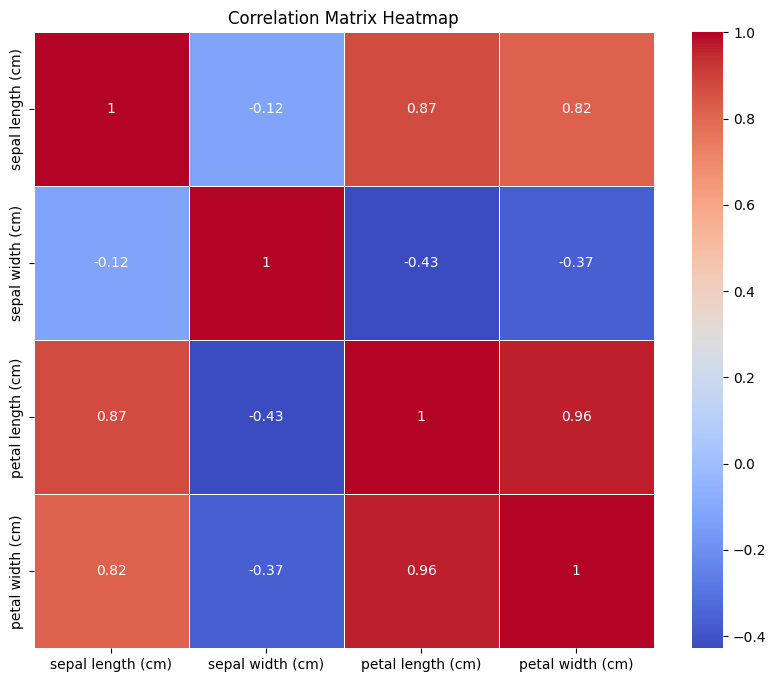

In [16]:
#find the correlation matrix of the features and visualize it using a heatmap
import seaborn as sns
correlation_matrix = numeric_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



In [17]:
numeric_features["petal area (cm^2)"] = numeric_features["petal length (cm)"] * numeric_features["petal width (cm)"]
numeric_features.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),petal area (cm^2)
0,5.1,3.5,1.4,0.2,0.28
1,4.9,3.0,1.4,0.2,0.28
2,4.7,3.2,1.3,0.2,0.26
3,4.6,3.1,1.5,0.2,0.30
4,5.0,3.6,1.4,0.2,0.28


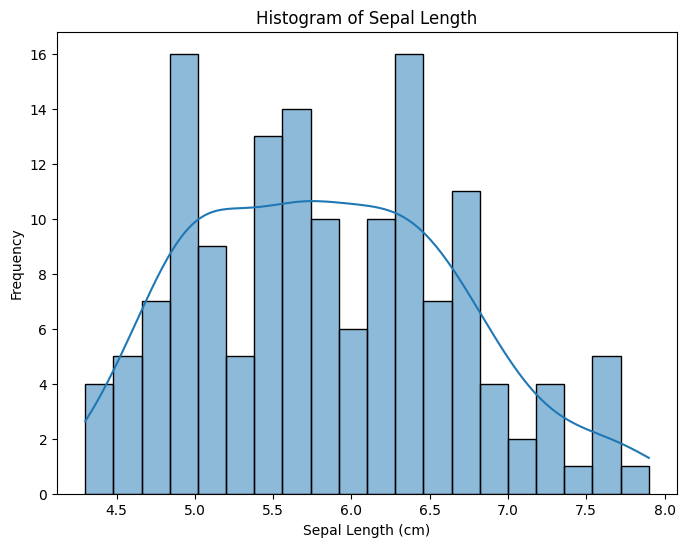

In [18]:
#histogram of sepal length
plt.figure(figsize=(8, 6))
sns.histplot(numeric_features['sepal length (cm)'], bins=20, kde=True)
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()


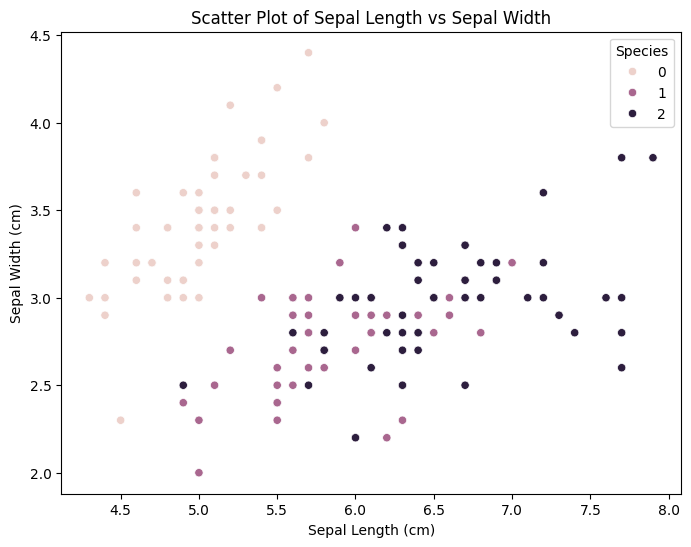

In [19]:
#scatter plot of sepal length vs sepal width
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=numeric_features, hue=y)
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species', loc='upper right')
plt.show()


In [20]:
# barchart for avg sepal length for each species
avg_sepal_length = df.groupby(y)['sepal length (cm)'].mean()


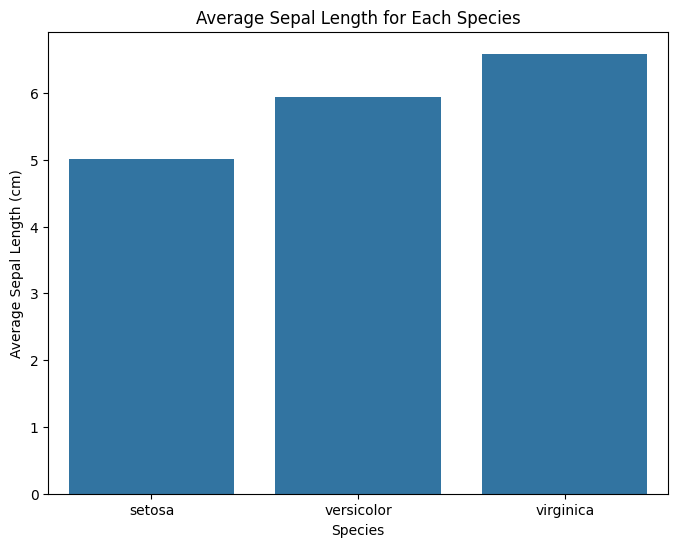

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_sepal_length.index, y=avg_sepal_length.values)
plt.title('Average Sepal Length for Each Species')
plt.xlabel('Species')
plt.ylabel('Average Sepal Length (cm)')
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.show()
